My understanding on a logistics regression is that it is a classification model and it produces results in a binary format (discrete/categorical). <br> <br>
Means the prediction will be in 0 or 1, Yes or No etc. which is very fitting in this Titanic scenario where the result we want to find out is alive or not.

# Importing Libraries

In [381]:
#import libraries 

#structures
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D

#get model duration
import time
from datetime import date

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanicdataset-traincsv/train.csv


# Description of data

In [382]:
#load dataset
data = '../input/titanicdataset-traincsv/train.csv'
dataset = pd.read_csv(data)
dataset.shape

(891, 12)

The titanic train data consists of 891 rows and 12 columns.

In [383]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [384]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [385]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [386]:
print("Total number of passengers in the dataset: " + str(len(dataset.index)))

Total number of passengers in the dataset: 891


**Data Definitions** <br> <br>

* PassengerId - Unique Id of each passenger on the ship
* Survived - '0' for not survived & '1' for survived
* Pclass - Passenger class: '1' for 1st class, '2' for 2nd class & '3' for 3rd class
* Name - Passenger name
* Sex - Passenger gender: 'male' or 'female'
* Age - Passenger age
* SibSp - No. of siblings or spouses aborded Titanic together with the passenger
* Parch - No. of parents or children aborded Titanic together with the passenger
* Ticket - Passenger ticket number
* Fare - Passenger ticket fare
* Cabin - Passenger cabin number
* Embarked - Encoded name of city passenger embarked

# Analyzing Data

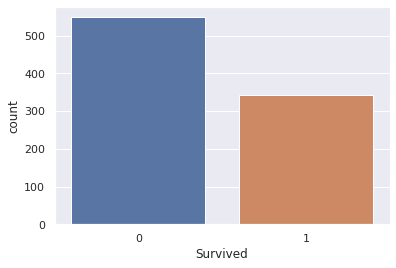

In [387]:
sns.countplot(x="Survived", data=dataset)

We can see only one third of the total passengers survived the incident.

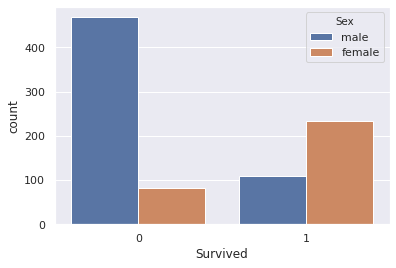

In [388]:
sns.countplot(x="Survived", hue="Sex", data=dataset)

We can see females have a higher survival rate than males in this scenario. <br>
Based on the Titanic movie, they arranged females and children to board the lifeboats so it makes sense, I guess.

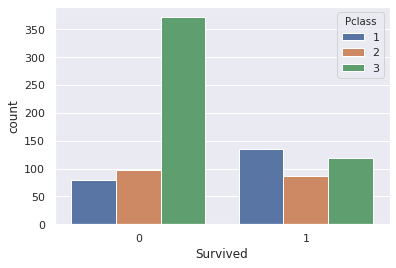

In [389]:
sns.countplot(x="Survived", hue="Pclass", data=dataset)

The death rate of 3rd class passengers are much higher than the other 2 passenger classes. <br>
Again, with a reference to the Titanic movie, 3rd class passengers are staying at the lowest level of the ship and they have longer route to get to the top when the ship was sinking.

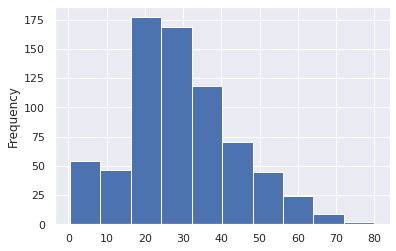

In [390]:
dataset["Age"].plot.hist()

We can see average population of passengers on the titanic are young to middle age group.

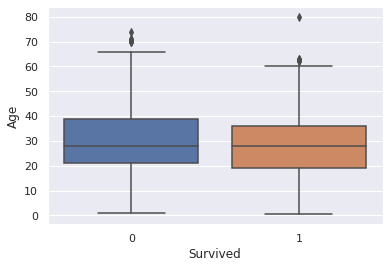

In [391]:
sns.boxplot(x="Survived", y="Age", data=dataset)

We can see that younger people tend to have a slightly higher survival rate than the older counterpart.

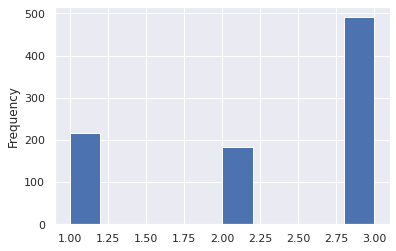

In [392]:
dataset["Pclass"].plot.hist()

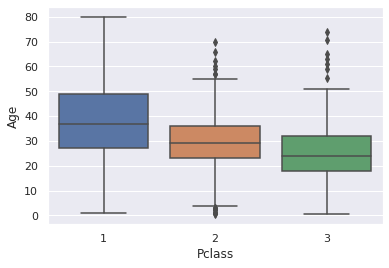

In [393]:
sns.boxplot(x="Pclass", y="Age", data=dataset)

We can see that older population of passengers are more likely to be in Passenger Class 1 & Class 2 than Class 3.

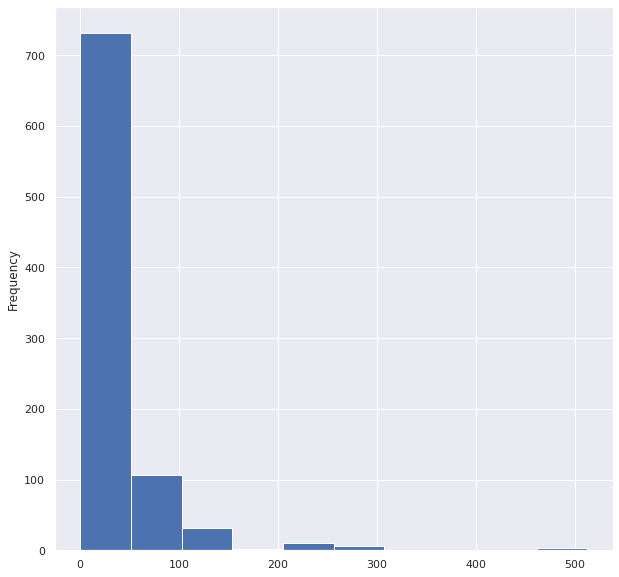

In [394]:
dataset["Fare"].plot.hist(figsize=(10,10))

So we can see most of the passengers on Titanic are 3rd class passengers.

In [395]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


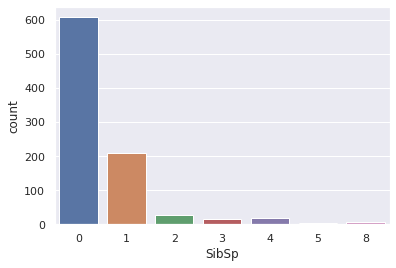

In [396]:
sns.countplot(x="SibSp", data=dataset)

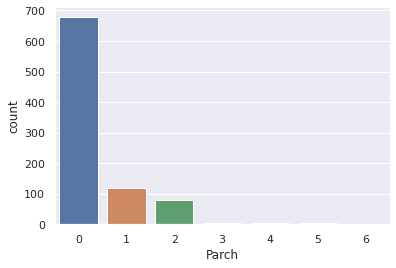

In [397]:
sns.countplot(x="Parch", data=dataset)

Based on the 2 graphs above, we can conclude most of the passengers on titanic are single passengers and the 2nd most are most likely couples. <br> <br>

This sounds plausible because as we already saw above that most of the passengers on Titanic are 3rd class passengers and normally, when you are travelling with a family or a spouse, you definitely don't want to choose a 3rd class unless you have no choice.

# Cleaning Data

In [398]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [399]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, there are many null values under 'Cabin' column. <br>

687 out of 891 data points is a really high amount. Also there are quite a number of null values under age. <br>

This will surely affect the prediction results if left unhandled. <br>

Handling null values in dataset has two approaches. We can determine the null value at a given point by averaging out the surrounding values under the feature. However, this only works given that the data is an ordinal data and we know that it is in either ascending or descending order or have some sort of pattern. In our case,  it is not. And same for the 'Cabin' feature as well which actually looks like a nominal data. <br>

Therefore, I decided to remove 177 lines of data from Age along with the whole column of 'Cabin' from the dataset.

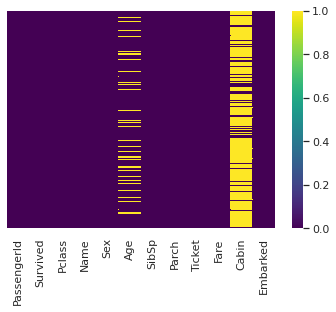

In [400]:
sns.heatmap(dataset.isnull(), yticklabels=False, cmap="viridis")

In [401]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [402]:
#dropping 'Cabin' feature
dataset.drop("Cabin", axis=1, inplace=True)

In [403]:
#check if the 'Cabin' feature is dropped
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


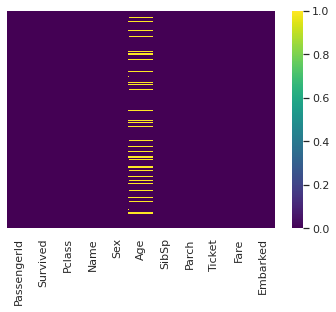

In [404]:
sns.heatmap(dataset.isnull(), yticklabels=False, cmap="viridis")

In [405]:
#dropping rows of data with 'Age' null
dataset.dropna(inplace=True)

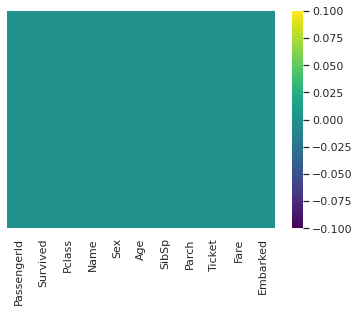

In [406]:
sns.heatmap(dataset.isnull(), yticklabels=False, cmap="viridis")

In [407]:
#checking if any more null value in the dataset
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

So now it is confirmed that the dataset is clean without any null value.

In [408]:
dataset.shape

(712, 11)

We are left with 712 data points which is plenty.

In [409]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now we need to convert features: "Pclass", "Sex" & "Embarked" into categorical binary data which is 0 & 1 or True or False or something along. We have 2 options: we can use a label encoder or we can use a pandas method as well.

First, lets check how many unique values in each of these features.

In [410]:
dataset.Pclass.unique()

array([3, 1, 2])

We have 3 unique values. <br>
So we can convert 'Pclass' feature into 2 columns '2' for 2nd Class & '3' for 3rd Class with 0 for No & 1 for Yes values. <br>
0 in both of these columns will be automatically 1st class.

In [411]:
dataset.Sex.unique()

array(['male', 'female'], dtype=object)

We have 2 unique values only. So we can convert 'Sex' feature values into '0' for female & '1' for male.

In [412]:
dataset.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

We can convert 'Embarked' feature into 3 columns 'S', 'C', 'Q' with 0 for No & 1 for Yes values.

In [413]:
Pcl=pd.get_dummies(dataset["Pclass"],drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [414]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = dataset
a = dataset['Sex']

X['Sex'] = le.fit_transform(X['Sex'])

a = le.transform(a)
dataset = X

In [415]:
embark=pd.get_dummies(dataset["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [416]:
dataset=pd.concat([dataset,embark,Pcl],axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1,0,1


Lets drop the redundant columns which includes 'PassengerId', 'Pclass', 'Name', 'Ticket' & 'Embarked'.

In [417]:
dataset.drop(['PassengerId','Pclass', 'Name','Ticket','Embarked'],axis=1, inplace=True)
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,C,Q,S,2,3
0,0,1,22.0,1,0,7.2500,0,0,1,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,1


# Pearson's Correlation

In [62]:
#get correlation map
corr_mat=dataset.corr()

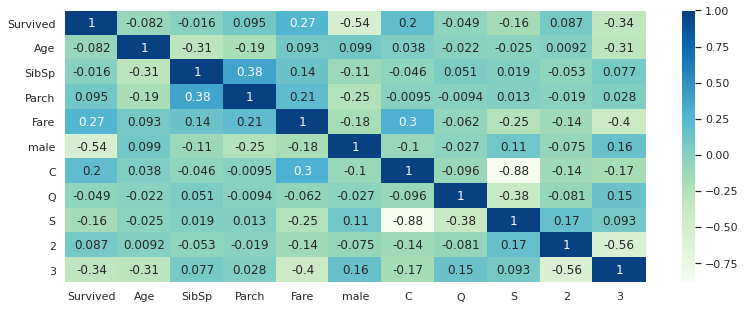

In [63]:
#visualise data
plt.figure(figsize=(13,5))
sns_plot=sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.show()

# Logistics Regression

## Train & Test Data

In [64]:
# Train
X = dataset.drop("Survived", axis=1)
y = dataset["Survived"]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel=LogisticRegression()

In [69]:
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
predictions = logmodel.predict(X_test)
print(predictions)

[1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1]


In [71]:
from sklearn.metrics import classification_report

In [418]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       170
           1       0.73      0.72      0.73       115

    accuracy                           0.78       285
   macro avg       0.77      0.77      0.77       285
weighted avg       0.78      0.78      0.78       285



In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y_test, predictions)

array([[140,  30],
       [ 32,  83]])

So we have following confusion matrix values: <br> <br>

Predicted No:Actual No: 140 <br>
Predicted No:Actual Yes: 32 <br> <br>

Predicted Yes:Actual No: 30 <br>
Predicted Yes:Actual Yes: 83 <br> <br>

Lets look at Sensitivity & Specificity values. <br> <br>

Sensitivity = (Predicted No:Actual No value)/(Total No) = 140/172 = 0.814 <br> <br>

Specificity = (Predicted Yes:Actual Yes value)/(Total Yes) = 83/113 = 0.735 <br> <br>

We have higher Sensitivity score over Specificity score. So we can conclude our model is better at predicting the number of people who do no survive the incident.

In [75]:
from sklearn.metrics import accuracy_score 

In [76]:
accuracy_score(y_test,predictions) #(0+1)/(0+1+1+3) = 0.2

0.7824561403508772